
UNIVERSIDAD CENTRAL DEL ECUADOR

PROGRAMACION PARA DISPOSITIVOS MOVILES

DÉCIMO

ELVIS HERRERA

1. Pre Requisitos

In [24]:
# Instalación de las librerias o dependencias necesarias
!pip install pandas seaborn matplotlib scikit-learn

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Para graficación
from sklearn.cluster import KMeans # Para el modelamiento

2. Carga de la Data

In [60]:
# Ubicacion del archivo de datos
url = 'PREMIER.csv' # external url?

In [61]:
# Se carga el archvio csv con pandas DataFrame
data = pd.read_csv(url) # Recupera los datos en formato csv a tipo dataframe (Estructura de datos bidimensional)
data.head() # Visualiza los 5 primeros datos del dataframe

,Unnamed: 0,Pos,Club,PJ,PG,PE,PP,G. Favor,G. contra,Dif,Puntos,Títulos,Temporadas,Div. actual
0,0,1°,Liverpool F. C.,4286,2035,1061,1190,7190,5150,2040,7166,19,108,Premier League
1,1,2°,Arsenal F. C.,4286,1966,1087,1233,7125,5368,1757,6985,13,106,Premier League
2,2,3°,Everton F. C.,4670,1886,1171,1613,7195,6482,713,6829,9,120,Premier League
3,3,4°,Manchester United F. C.,3930,1888,967,1075,6766,4984,1782,6631,20,98,Premier League
4,4,5°,Aston Villa F. C.,4222,1699,996,1527,6807,6290,517,6093,7,109,Premier League


3. Inspeccion de la data

In [62]:
# Visualizamos el DataFrame
data

,Unnamed: 0,Pos,Club,PJ,PG,PE,PP,G. Favor,G. contra,Dif,Puntos,Títulos,Temporadas,Div. actual
0,0,1°,Liverpool F. C.,4286,2035,1061,1190,7190,5150,2040,7166,19,108,Premier League
1,1,2°,Arsenal F. C.,4286,1966,1087,1233,7125,5368,1757,6985,13,106,Premier League
2,2,3°,Everton F. C.,4670,1886,1171,1613,7195,6482,713,6829,9,120,Premier League
3,3,4°,Manchester United F. C.,3930,1888,967,1075,6766,4984,1782,6631,20,98,Premier League
4,4,5°,Aston Villa F. C.,4222,1699,996,1527,6807,6290,517,6093,7,109,Premier League
5,5,6°,Manchester City F. C.,3772,1562,892,1318,6069,5343,726,5578,9,94,Premier League
6,6,7°,Tottenham Hotspur F. C.,3546,1484,850,1212,5627,4942,685,5302,2,88,Premier League
7,7,8°,Chelsea F. C.,3550,1457,914,1179,5450,4926,524,5285,6,88,Premier League
8,8,9°,Newcastle United F. C.,3616,1392,884,1340,5400,5224,176,5060,4,91,Premier League
9,9,10°,Sunderland A.F.C.,3340,1260,780,1300,5143,5121,22,4560,6,86,Championship


In [63]:
# Remove unnecesary cols
# https://www.educative.io/answers/how-to-delete-a-column-in-pandas
# https://sparkbyexamples.com/pandas/pandas-drop-multiple-columns-by-index
# data.drop('a', inplace=True, axis=1)
data = data.drop(data.columns[[0, 13]], axis=1)
data

,Pos,Club,PJ,PG,PE,PP,G. Favor,G. contra,Dif,Puntos,Títulos,Temporadas
0,1°,Liverpool F. C.,4286,2035,1061,1190,7190,5150,2040,7166,19,108
1,2°,Arsenal F. C.,4286,1966,1087,1233,7125,5368,1757,6985,13,106
2,3°,Everton F. C.,4670,1886,1171,1613,7195,6482,713,6829,9,120
3,4°,Manchester United F. C.,3930,1888,967,1075,6766,4984,1782,6631,20,98
4,5°,Aston Villa F. C.,4222,1699,996,1527,6807,6290,517,6093,7,109
5,6°,Manchester City F. C.,3772,1562,892,1318,6069,5343,726,5578,9,94
6,7°,Tottenham Hotspur F. C.,3546,1484,850,1212,5627,4942,685,5302,2,88
7,8°,Chelsea F. C.,3550,1457,914,1179,5450,4926,524,5285,6,88
8,9°,Newcastle United F. C.,3616,1392,884,1340,5400,5224,176,5060,4,91
9,10°,Sunderland A.F.C.,3340,1260,780,1300,5143,5121,22,4560,6,86


In [64]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pos                10 non-null     object
 1                Club  10 non-null     object
 2   PJ                 10 non-null     int64 
 3   PG                 10 non-null     int64 
 4   PE                 10 non-null     int64 
 5   PP                 10 non-null     int64 
 6   G. Favor           10 non-null     int64 
 7   G. contra          10 non-null     int64 
 8   Dif                10 non-null     int64 
 9   Puntos             10 non-null     int64 
 10  Títulos            10 non-null     int64 
 11  Temporadas         10 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 1.1+ KB


In [65]:
# Realizamos una descripción de los estadísticos básicos para comprender la data
data.describe()

,PJ,PG,PE,PP,G. Favor,G. contra,Dif,Puntos,Títulos,Temporadas
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,3921.800000,1662.900000,960.20000,1298.700000,6277.200000,5383.000000,894.200000,5948.900000,9.500000,98.800000
std,428.067959,269.231602,119.82005,163.640561,824.634303,552.068836,707.596213,914.781874,6.059886,11.409548
min,3340.000000,1260.000000,780.00000,1075.000000,5143.000000,4926.000000,22.000000,4560.000000,2.000000,86.000000
25%,3566.500000,1463.750000,886.00000,1195.500000,5494.250000,5018.250000,518.750000,5289.250000,6.000000,88.750000
50%,3851.000000,1630.500000,940.50000,1266.500000,6417.500000,5187.000000,699.000000,5835.500000,8.000000,96.000000
75%,4270.000000,1887.500000,1044.75000,1334.500000,7045.500000,5361.750000,1499.250000,6779.500000,12.000000,107.500000
max,4670.000000,2035.000000,1171.00000,1613.000000,7195.000000,6482.000000,2040.000000,7166.000000,20.000000,120.000000


4. Depuración de la data

Se lo realiza cuando se tiene la eliminación de algunos signos

In [49]:
# Fix no value in Titulos col
def fixTitulos(val):
    return 0 if val == '-' else int(val)

In [66]:
# Correccion de lo campos mal formateados (Jugador y Promedio)
# data.apply(lambda x : fixTitulos(x['Títulos']), axis=1)
#data['Jugador'] = data.apply(lambda x: fixTitulos(x['Jugador']), axis=1) # Aplicamos la funcion fixTitulos() a la columna [Titulos]
# data.apply(lambda x : fixRend(x['Rend.']), axis=1)
#data['Rend.'] = data['Rend.'].apply(lambda x: fixRend(x)) # Aplicamos la funcion fixRend() a la columna [Rend]
data

,Pos,Club,PJ,PG,PE,PP,G. Favor,G. contra,Dif,Puntos,Títulos,Temporadas
0,1°,Liverpool F. C.,4286,2035,1061,1190,7190,5150,2040,7166,19,108
1,2°,Arsenal F. C.,4286,1966,1087,1233,7125,5368,1757,6985,13,106
2,3°,Everton F. C.,4670,1886,1171,1613,7195,6482,713,6829,9,120
3,4°,Manchester United F. C.,3930,1888,967,1075,6766,4984,1782,6631,20,98
4,5°,Aston Villa F. C.,4222,1699,996,1527,6807,6290,517,6093,7,109
5,6°,Manchester City F. C.,3772,1562,892,1318,6069,5343,726,5578,9,94
6,7°,Tottenham Hotspur F. C.,3546,1484,850,1212,5627,4942,685,5302,2,88
7,8°,Chelsea F. C.,3550,1457,914,1179,5450,4926,524,5285,6,88
8,9°,Newcastle United F. C.,3616,1392,884,1340,5400,5224,176,5060,4,91
9,10°,Sunderland A.F.C.,3340,1260,780,1300,5143,5121,22,4560,6,86


In [67]:
# Inspeccionamos el tipo de dato de cada variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pos                10 non-null     object
 1                Club  10 non-null     object
 2   PJ                 10 non-null     int64 
 3   PG                 10 non-null     int64 
 4   PE                 10 non-null     int64 
 5   PP                 10 non-null     int64 
 6   G. Favor           10 non-null     int64 
 7   G. contra          10 non-null     int64 
 8   Dif                10 non-null     int64 
 9   Puntos             10 non-null     int64 
 10  Títulos            10 non-null     int64 
 11  Temporadas         10 non-null     int64 
dtypes: int64(10), object(2)
memory usage: 1.1+ KB


4. Análisis de la Data

In [68]:
data[['PJ', 'PG', 'PE', 'PP', 'G. Favor', 'G. contra', 'Dif', 'Puntos', 'Títulos', 'Temporadas']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

<ipython-input-68-5a14d7d87de8>:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  data[['PJ', 'PG', 'PE', 'PP', 'G. Favor', 'G. contra', 'Dif', 'Puntos', 'Títulos', 'Temporadas']].corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,PJ,PG,PE,PP,G. Favor,G. contra,Dif,Puntos,Títulos,Temporadas
PJ,1.00,0.87,0.97,0.47,0.94,0.73,0.54,0.89,0.50,0.99
PG,0.87,1.00,0.88,-0.01,0.97,0.32,0.88,1.00,0.80,0.81
PE,0.97,0.88,1.00,0.36,0.91,0.62,0.58,0.91,0.51,0.94
PP,0.47,-0.01,0.36,1.00,0.21,0.93,-0.47,0.03,-0.39,0.57
G. Favor,0.94,0.97,0.91,0.21,1.00,0.53,0.75,0.97,0.70,0.91
G. contra,0.73,0.32,0.62,0.93,0.53,1.00,-0.16,0.36,-0.08,0.80
Dif,0.54,0.88,0.58,-0.47,0.75,-0.16,1.00,0.85,0.89,0.44
Puntos,0.89,1.00,0.91,0.03,0.97,0.36,0.85,1.00,0.77,0.84
Títulos,0.50,0.80,0.51,-0.39,0.70,-0.08,0.89,0.77,1.00,0.45
Temporadas,0.99,0.81,0.94,0.57,0.91,0.80,0.44,0.84,0.45,1.00


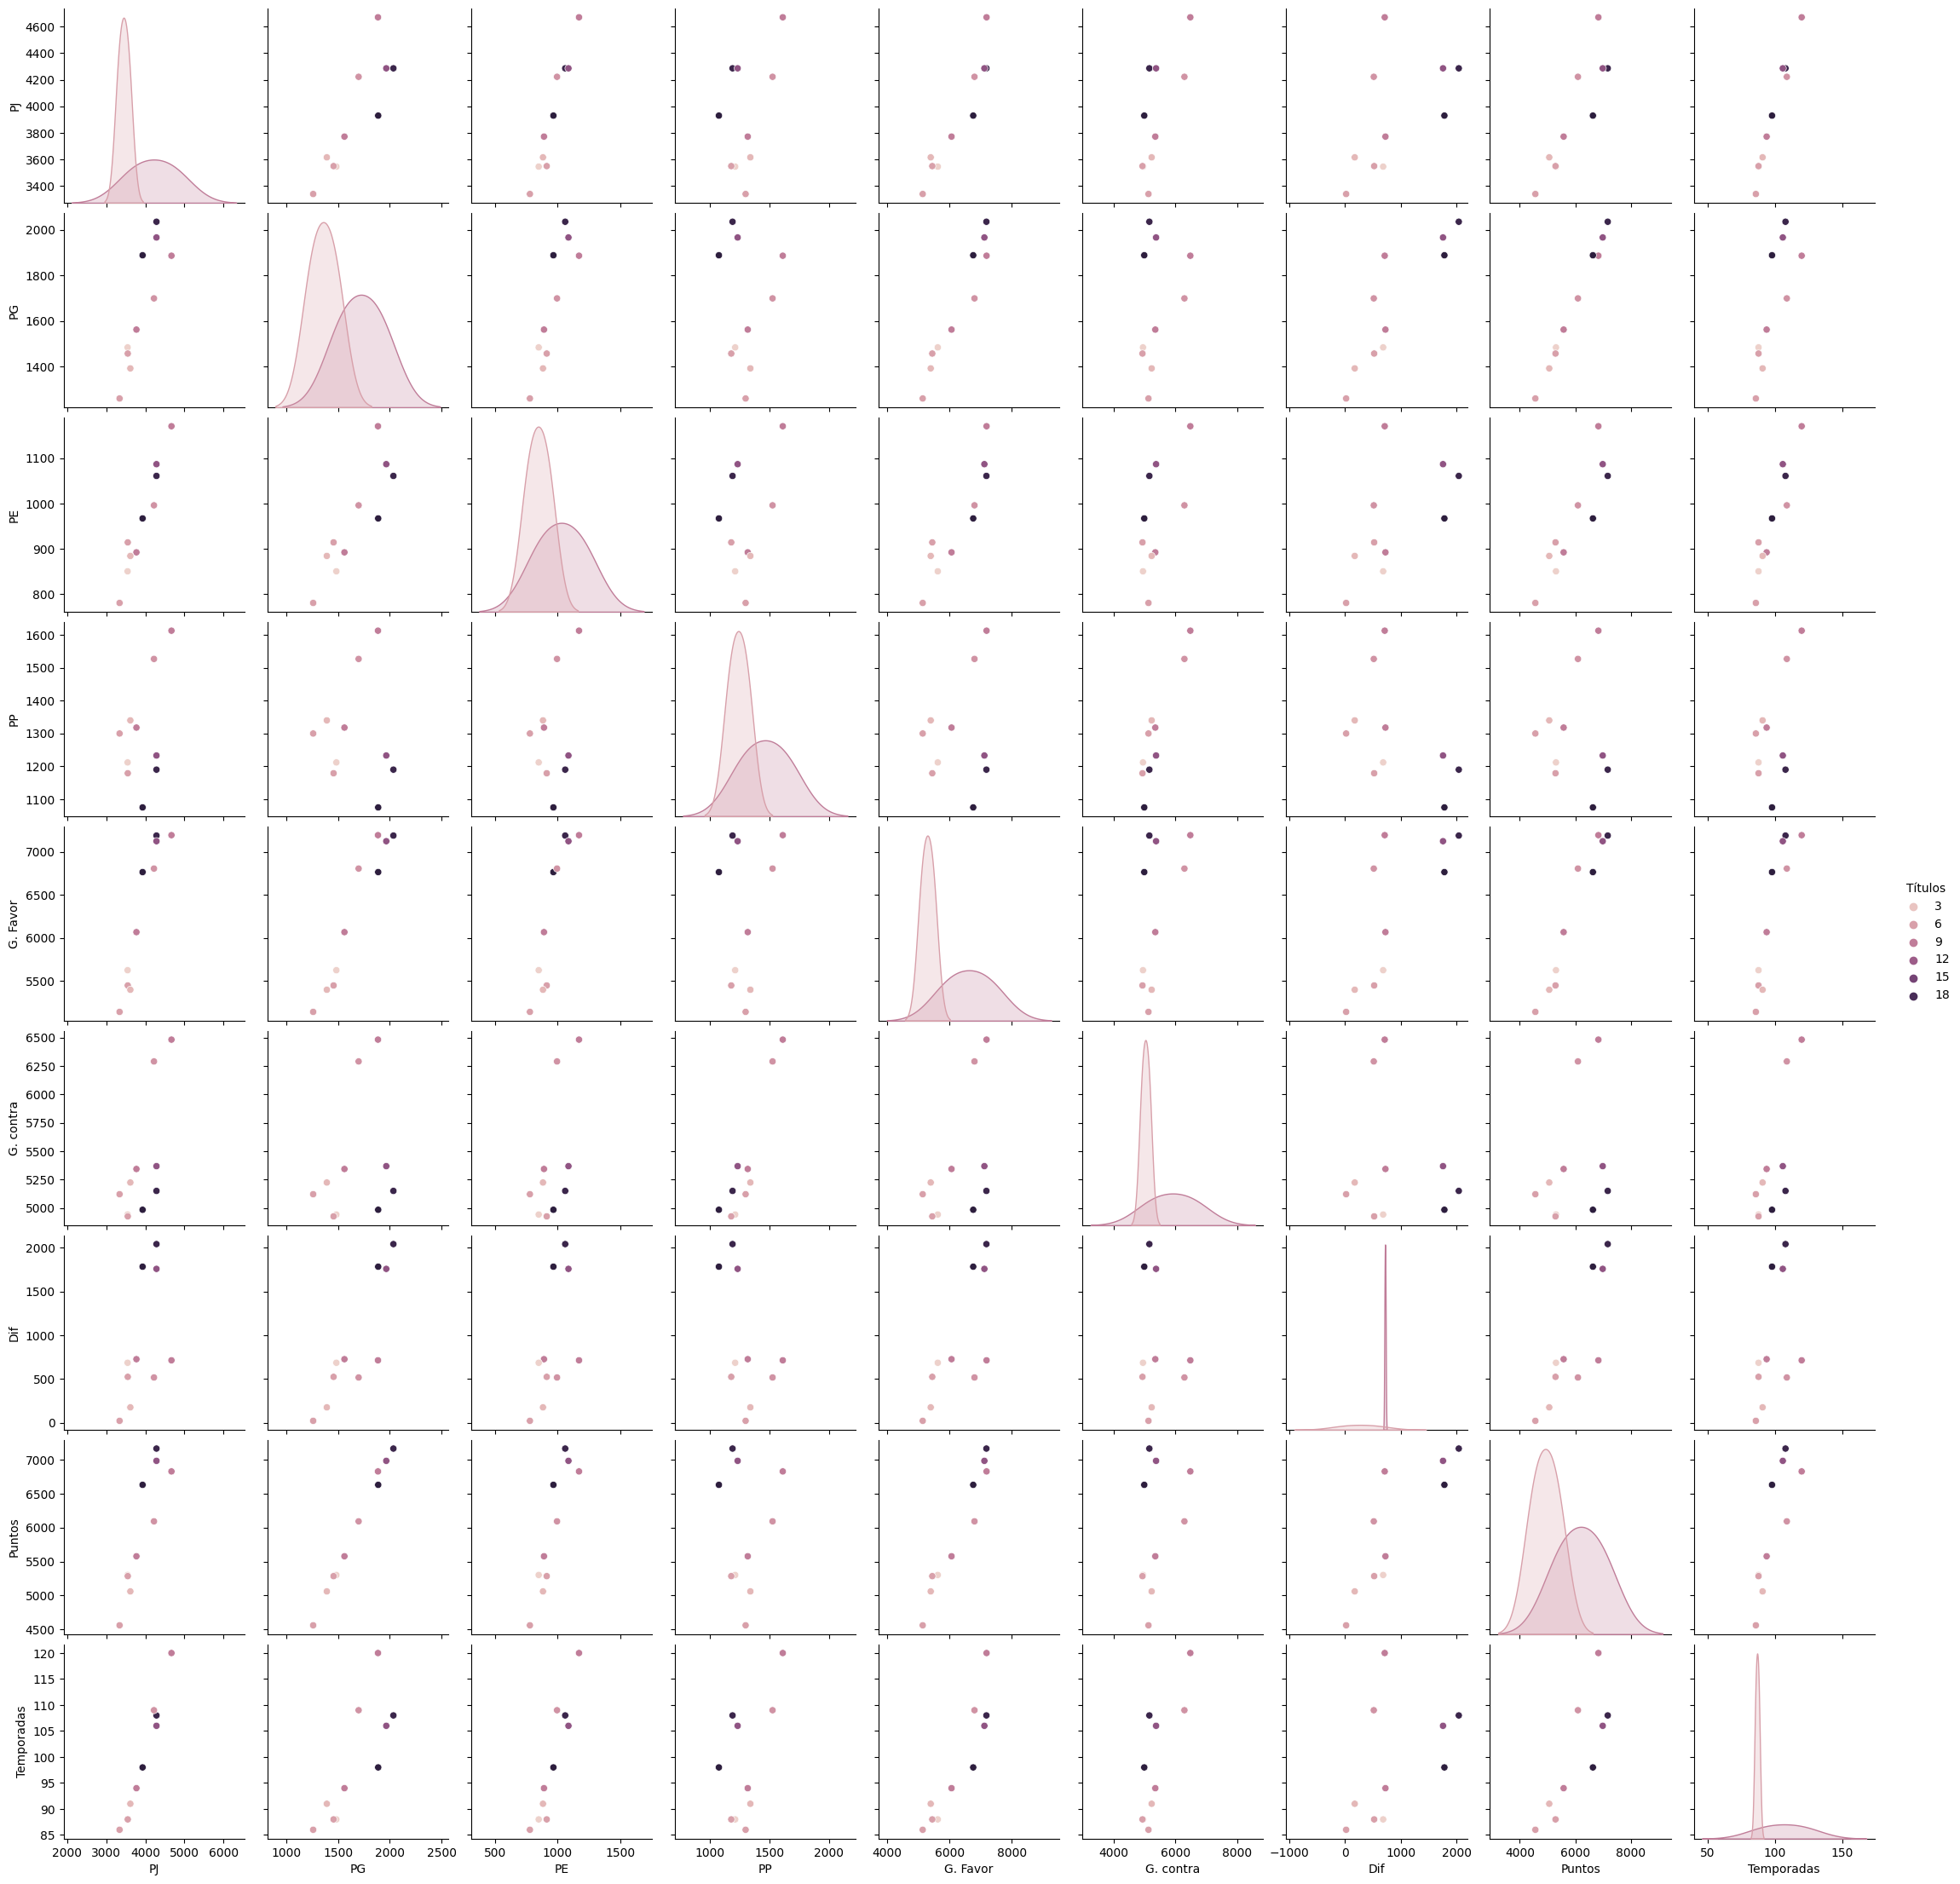

In [70]:
# Grafica de correlaciones respecto a los Estados
sns.pairplot(data,hue="Títulos")

In [71]:
# Seleccción de variables significativas
# sel_data = data[['TJ','Pts.', 'PJ', 'PE', 'PP', 'GF', 'GC', 'Dif.', 'Títulos']]
sel_data = data[['PJ','PG', 'PE', 'PP', 'G. Favor', 'Puntos', 'Títulos']]
sel_data

,PJ,PG,PE,PP,G. Favor,Puntos,Títulos
0,4286,2035,1061,1190,7190,7166,19
1,4286,1966,1087,1233,7125,6985,13
2,4670,1886,1171,1613,7195,6829,9
3,3930,1888,967,1075,6766,6631,20
4,4222,1699,996,1527,6807,6093,7
5,3772,1562,892,1318,6069,5578,9
6,3546,1484,850,1212,5627,5302,2
7,3550,1457,914,1179,5450,5285,6
8,3616,1392,884,1340,5400,5060,4
9,3340,1260,780,1300,5143,4560,6


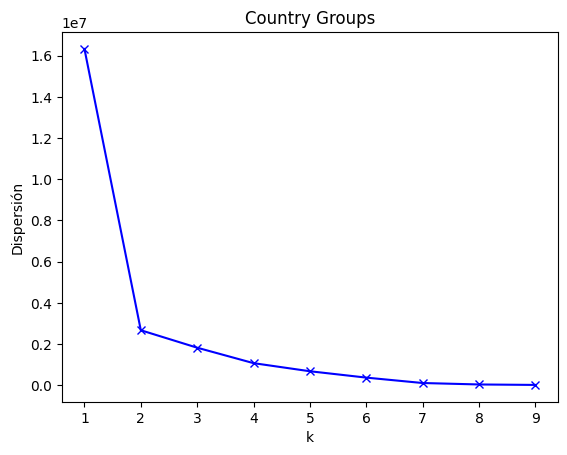

In [72]:
# Analsis de Dispersión por método de Codo
def plot_dispersion(x, figure_name, max_k = 10, n_init = 10):
    inertia = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        inertia.append(kmeans.inertia_)

    plt.plot(range(1, max_k), inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel(u'Dispersión')
    plt.title(figure_name)

plot_dispersion(sel_data, 'Country Groups')